In [77]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
# rates
k1 = 1.0
k2 = 2.0
k3 = 0.02
k4 = 0.04

# initial population
X = 0
Y = 0

t = 0 # time
n = 0 # reaction counter

Xall, Yall, tall = [], [], []


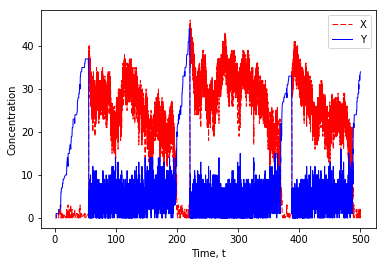

In [121]:
while t <= 500:
    a1 = k1
    a2 = X * k2
    a3 = k3*X*X*Y
    a4 = k4*X
    a = np.array([a1, a2, a3, a4])
#     print a
    a0 = sum(a)
    # print a0
    
    r = np.random.random(2)
#     print('r: '+str(r))
    r1 = r[0] # for choosing time
    r2 = r[1] # for choosing reaction

    T = (1/a0)*np.log(1/r1) # find next reaction time
#     print('T: '+str(T))

    mu = 0 # choose next reaction
    N = r2*a0 - a[mu]
#     print('N: '+str(N))

    while N > 0:
        mu = mu + 1
#         print('mu: '+str(mu))
        N = N - a[mu]
#         print('N: '+str(N))

    next_r = mu
#     print "next_reaction: ", next_r

    t = t + T # increment time
    n = n + 1 # increment reaction counter

    if next_r == 0:
        X = X + 1
#         print "X: ", X
    elif next_r == 1:
        X = X - 1
#         print "X: ", X
        Y = Y + 1 
#         print "Y: ", Y
    elif next_r == 2:
        X = X + 1
#         print "X: ", X
        Y = Y - 1 
#         print "Y: ", Y
    elif next_r == 3:
        X = X - 1
#         print "X: ", X
    
    tall.append(t)
#     print "tall: ", tall
    Xall.append(X)
#     print "Xall: ", Xall
    Yall.append(Y)
#     print "Yall: ", Yall

# print "Xall: ", Xall
# print "Yall: ", Yall
fig, ax = plt.subplots()
ax.plot(tall, Xall,'r--',linewidth=1.0, label='X')
ax.plot(tall, Yall,'b-',linewidth=1.0, label='Y')
plt.xlabel('Time, t')
plt.ylabel('Concentration')
plt.legend(['X','Y'])
plt.show()

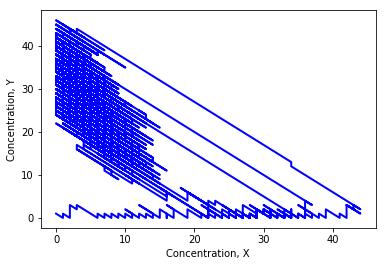

In [125]:
plt.plot(Yall, Xall,'b-',linewidth=2.0)
plt.xlabel('Concentration, X')
plt.ylabel('Concentration, Y')

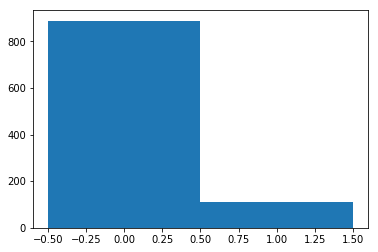

In [44]:
def choose_t_r(a0,a):
    
    # generate random numbers
    r = np.random.random(2)
    r1 = r[0]
    r2 = r[1]
    
    # choose next time increment T
    T = (1/a0)*np.log(1/r1)
    
    # choose next reaction (i ranges 1 -> M, where M is the number of reactions)
    mu = 0
    N = r2*a0 - a[mu]

    while N > 0:
        mu = mu + 1
        N = N - a[mu]

    next_r = mu
    
    return T, next_r 

def run_choose_t_r_many_times(a):
    a0 = sum(a)
    
    r = np.zeros((1000,1))

    for i in range(1000):
        #print "simulation: ", i
        res = choose_t_r(a0,a)
        #print "reaction chosen: ", res[1]
        r[i] = res[1]
        #print "r: ", r[:10]
    
    # histogram the reactions chosen
    bins = np.array([-0.5,0.5,1.5])
    plt.hist(r, bins)
    
a = np.array([9000*0.01, 10*1])
run_choose_t_r_many_times(a)